# Step 7: Train linear classification model

This model will serve as a benchmark for more complex classification models. The following steps will be covered in this notebook:
1. Prepare data
2. Load and save model
3. Setup logging
4. Train model

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import keras.backend as K
K.clear_session()

/home/paperspace/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

## Prepare data

In [4]:
from tep.config import Config
config = Config()
classes = config.CLASSES
num_classes = len(classes) + 1
print(num_classes)

5


In [5]:
from tep.utils import load_array
features = load_array(filename="data/auxiliary_features.bc")
labels = load_array(filename="data/classification_labels.bc")
print(features.shape)
print(labels.shape)

(1293005, 15)
(1293005,)


In [6]:
from tep.trainUtils import one_hot_encoding
oh_labels = one_hot_encoding(class_labels=labels, number_classes=num_classes)
print(oh_labels.shape)

(1293005, 5)


## Compile and save model

In [7]:
from tep.linearModel import classification_model
model = classification_model(input_dim=features.shape[1], output_dim=num_classes)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalized_inputs (BatchNorm (None, 15)                60        
_________________________________________________________________
output (Dense)               (None, 5)                 80        
Total params: 140
Trainable params: 110
Non-trainable params: 30
_________________________________________________________________


In [8]:
from tep.modelUtils import save_architecture
model_name = "lin_class"
model_path = "models/" + model_name
save_architecture(model, model_path + ".json")

## Setup logging

In [9]:
!mkdir $model_path

mkdir: cannot create directory ‘models/lin_class’: File exists


In [10]:
!rm $model_path/*

In [11]:
from tep.trainUtils import get_callbacks
cbs = get_callbacks(model_name=model_name, log_dir=model_path, verbose=1)

Instructions for updating:
Use the retry module or similar alternatives.


## Train model

In [12]:
# use settings for testing on sample
#train_size = 10000
#val_size = 1000
#batch_size = 64

# use settings for running on full data
val_size = 10000
train_size = features.shape[0] - val_size
batch_size = 512

In [13]:
# now, we can train the model for the first time
model.fit(features[:train_size], 
          oh_labels[:train_size], 
          validation_data=(features[-val_size:], oh_labels[-val_size:]), 
          batch_size=batch_size, 
          epochs=100, 
          verbose=2,
          shuffle=True,
          callbacks=cbs)

Train on 1283005 samples, validate on 10000 samples
Epoch 1/100
 - 9s - loss: 1.1861 - acc: 0.4863 - val_loss: 1.0879 - val_acc: 0.5267

Epoch 00001: val_loss improved from inf to 1.08788, saving model to models/lin_class.hdf5
Epoch 2/100
 - 9s - loss: 1.1013 - acc: 0.5205 - val_loss: 1.0841 - val_acc: 0.5315

Epoch 00002: val_loss improved from 1.08788 to 1.08413, saving model to models/lin_class.hdf5
Epoch 3/100
 - 9s - loss: 1.1003 - acc: 0.5225 - val_loss: 1.0839 - val_acc: 0.5313

Epoch 00003: val_loss improved from 1.08413 to 1.08391, saving model to models/lin_class.hdf5
Epoch 4/100
 - 9s - loss: 1.1002 - acc: 0.5234 - val_loss: 1.0840 - val_acc: 0.5315

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 9s - loss: 1.0996 - acc: 0.5240 - val_loss: 1.0828 - val_acc: 0.5347

Epoch 00005: val_loss improved from 1.08391 to 1.08283, saving model to models/lin_class.hdf5
Epoch 6/100
 - 9s - loss: 1.0993 - acc: 0.5240 - val_loss: 1.0826 - val_acc: 0.5351

Epoch 00006: val_loss improv

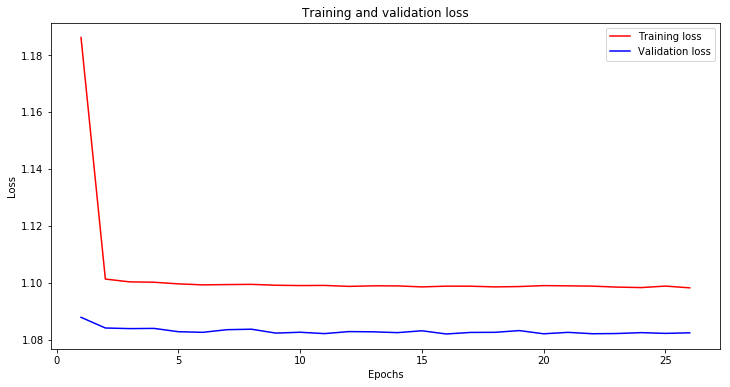

In [14]:
from tep.trainUtils import plot_loss
history = cbs[2]
plot_loss(history)

In [15]:
from tep.trainUtils import print_classification_metrics
print_classification_metrics(history)

loss: 1.0988216629412093, acc: 0.5250431603897316, val_loss: 1.082030640220642, val_acc: 0.5338000002384186


In [16]:
from tep.trainUtils import one_hot_to_class
predictions = model.predict(features[-val_size:])
print(predictions.shape)
predictions = one_hot_to_class(predictions)
print(predictions.shape)

(10000, 5)
(10000,)


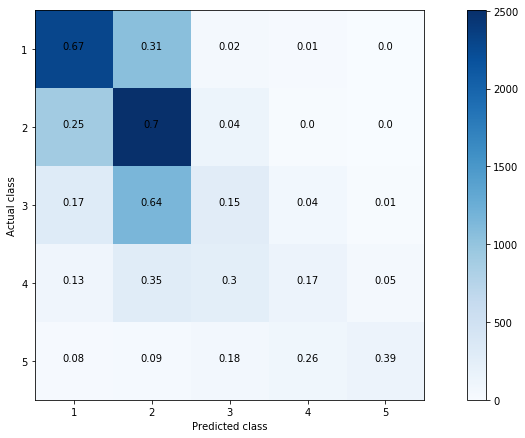

In [17]:
from tep.trainUtils import plot_cm
import numpy as np
actuals = labels[-val_size:]
plot_cm(predictions, actuals, np.arange(1, 6), normalize=True)